**Importing Libraries**

In [72]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
# Load datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

**Data Preparation**

In [74]:
# Aggregate transaction data
customer_transactions = transactions.groupby('CustomerID').agg(
    TotalSpending=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum'),
    UniqueProducts=('ProductID', 'nunique'),
).reset_index()

customer_transactions

,CustomerID,TotalSpending,TotalQuantity,UniqueProducts
0,C0001,3354.52,12,5
1,C0002,1862.74,10,4
2,C0003,2725.38,14,4
3,C0004,5354.88,23,8
4,C0005,2034.24,7,3
...,...,...,...,...
194,C0196,4982.88,12,3
195,C0197,1928.65,9,3
196,C0198,931.83,3,2
197,C0199,1979.28,9,4


In [75]:
# Merge with customer profile data
customers['CustomerID'] = customers['CustomerID'].astype(str)
customer_transactions['CustomerID'] = customer_transactions['CustomerID'].astype(str)
data = customers.merge(customer_transactions, on='CustomerID', how='left')

data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpending,TotalQuantity,UniqueProducts
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0,3.0


In [76]:
# Handle missing values
data.fillna(0, inplace=True)
data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpending,TotalQuantity,UniqueProducts
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0,5.0
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0,4.0
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0,4.0
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0,8.0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0,3.0


In [77]:
# Feature Selection and Scaling
features = ['TotalSpending', 'TotalQuantity', 'UniqueProducts']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

**Clustering Metrics**

In [78]:
db_index_scores=[]
silhouette_scores = []
inertia_scores = []

In [79]:
# Using K-Means
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)

    db_index = davies_bouldin_score(data_scaled, labels)
    db_index_scores.append((k, db_index))

    # Silhouette Score
    silhouette = silhouette_score(data_scaled, labels)
    silhouette_scores.append((k, silhouette))

    # Inertia (Within-cluster sum of squares)
    inertia = kmeans.inertia_
    inertia_scores.append((k, inertia))

print("Db scores=\n",db_index_scores)
print("silhouette_scores=\n",silhouette_scores)
print("inertia_scores=\n",inertia_scores)

Db scores=
 [(2, 0.7316768187412901), (3, 0.7911608347812669), (4, 0.8492343358515362), (5, 0.8933867517183687), (6, 0.9607882850374475), (7, 1.01400713615474), (8, 1.000243007705321), (9, 0.9635017483532297), (10, 1.0455320894152365)]
silhouette_scores=
 [(2, 0.4891735891779627), (3, 0.4026559439698973), (4, 0.3684880816105581), (5, 0.3503074110824241), (6, 0.34609877980484766), (7, 0.2995695242038967), (8, 0.31733143155398624), (9, 0.3208560103743846), (10, 0.3010387787220265)]
inertia_scores=
 [(2, 248.57529667843852), (3, 157.93931699825103), (4, 118.71190487814818), (5, 96.21394467542089), (6, 82.66367168393595), (7, 77.2489063812549), (8, 66.11986719176801), (9, 60.1576768198923), (10, 57.30120920562122)]


In [80]:
best_k_db, best_db_index = min(db_index_scores, key=lambda x: x[1])
best_k_sil, best_silhouette_score = max(silhouette_scores, key=lambda x: x[1])
best_k_in, best_interia= max(inertia_scores, key=lambda x: x[1])

print(f"Best number of clusters (DB Index): {best_k_db}\nDB Index: {best_db_index}\n")                            #lowest db index is considered
print(f"Best number of clusters (Silhouette Score): {best_k_sil}\nSilhouette Score: {best_silhouette_score}\n")   #highest Silhouette Score is considered
print(f"Best number of clusters (Interia score): {best_k_in}\nInteria Score: {best_interia}")                   #highest interia score is considered

Best number of clusters (DB Index): 2
DB Index: 0.7316768187412901

Best number of clusters (Silhouette Score): 2
Silhouette Score: 0.4891735891779627

Best number of clusters (Interia score): 2
Interia Score: 248.57529667843852


**Lowest Davies-Bouldin Index**

In [81]:
# Perform K-Means with the best number of clusters
kmeans_db = KMeans(n_clusters=best_k_db, random_state=42)
data['Cluster'] = kmeans_db.fit_predict(data_scaled)

data

,CustomerID,CustomerName,Region,SignupDate,TotalSpending,TotalQuantity,UniqueProducts,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,12.0,5.0,1
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,10.0,4.0,1
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,14.0,4.0,1
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,23.0,8.0,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,7.0,3.0,1
...,...,...,...,...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07,4982.88,12.0,3.0,1
196,C0197,Christina Harvey,Europe,2023-03-21,1928.65,9.0,3.0,1
197,C0198,Rebecca Ray,Europe,2022-02-27,931.83,3.0,2.0,1
198,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,9.0,4.0,1


**Dimensionality Reduction for Visualization**

In [82]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

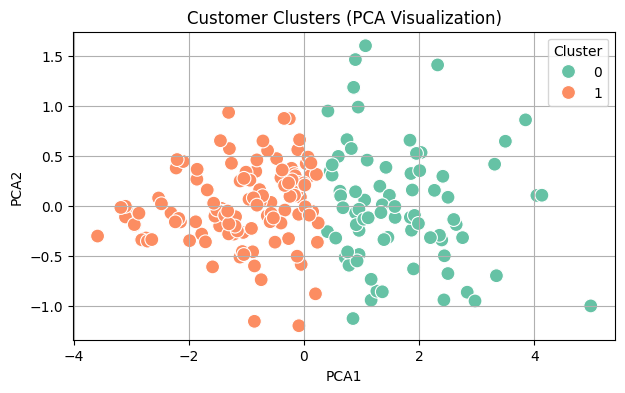

In [91]:

# Visualize Clusters
plt.figure(figsize=(7, 4))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.grid()
plt.show()



In [86]:
cluster_profiles = data.groupby('Cluster').agg(
    AverageSpending=('TotalSpending', 'mean'),          # Average total spending per cluster
    AveragePurchaseFrequency=('TotalQuantity', 'mean'), # Average purchase frequency per cluster
    ProductDiversity=('UniqueProducts', 'mean'),        # Average unique products per cluster
    CustomerCount=('CustomerID', 'count')               # Total number of customers in the cluster
).reset_index()

# Add percentage of customers in each cluster
total_customers = cluster_profiles['CustomerCount'].sum()
cluster_profiles['CustomerPercentage'] = (cluster_profiles['CustomerCount'] / total_customers) * 100

# Display Cluster Profiles
print("Cluster Profiles:\n",cluster_profiles)


Cluster Profiles:
    Cluster  AverageSpending  AveragePurchaseFrequency  ProductDiversity  \
0        0      5178.349615                 18.820513          6.871795   
1        1      2344.953197                  8.762295          3.590164   

   CustomerCount  CustomerPercentage  
0             78                39.0  
1            122                61.0  


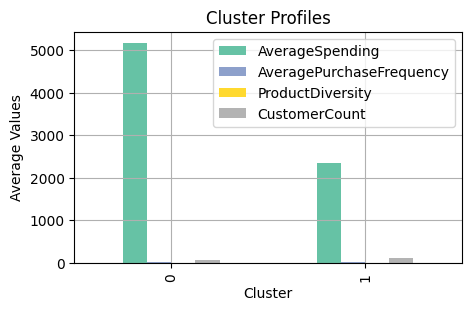

In [90]:
# Visualization: Bar plot of cluster profiles
cluster_profiles.set_index('Cluster')[['AverageSpending', 'AveragePurchaseFrequency', 'ProductDiversity','CustomerCount']].plot(
    kind='bar', figsize=(5, 3), colormap='Set2')
plt.title('Cluster Profiles')
plt.ylabel('Average Values')
plt.xlabel('Cluster')
plt.grid()
plt.show()
